In [2]:
import torch

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import csv

from PIL import Image
from transformers import AutoModel, AutoTokenizer
from torchvision import transforms
from tqdm import tqdm
from IPython.display import display

from minicpm import save_to_csv, test_model

#### model

In [3]:
!pip install peft

Defaulting to user installation because normal site-packages is not writeable


In [4]:
model = AutoModel.from_pretrained('openbmb/MiniCPM-V-2', trust_remote_code=True, torch_dtype=torch.bfloat16)
model = model.to(device='cuda', dtype=torch.bfloat16)
tokenizer = AutoTokenizer.from_pretrained('openbmb/MiniCPM-V-2', trust_remote_code=True)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

#### workspace

In [5]:
path = '../sampled'
files = os.listdir(path)
full_images = [file for file in files if file.endswith('.tif')]
full_images.sort()
len(full_images)

200

In [6]:
filename = 'shot_0'

for i in tqdm(range(len(full_images)), desc='Processing images'):
    context = 'You are a pathologist examing cell imagery'
    question = 'Give the count of nuclei in the image. You must return a numerical answer.'
    res, img = test_model(path, full_images[i], model, tokenizer, context, question, filename)

Processing images: 100%|██████████| 200/200 [01:55<00:00,  1.74it/s]


In [8]:
filename = 'shot_1'

for i in tqdm(range(len(full_images)), desc='Processing images'):
    context = 'You are a pathologist examing cell imagery. There are 14 nuclei in the following example. They are identified by detecting individual blue shapes.'
    question = 'Remember this example and use it to help with future problems.'
    question2 = 'Give the count of nuclei in the image. You must return a numerical answer.'
    res, img = test_model(path, full_images[i], model, tokenizer, context, question, filename, full_images[0], question2)

Processing images: 100%|██████████| 200/200 [18:04<00:00,  5.42s/it]


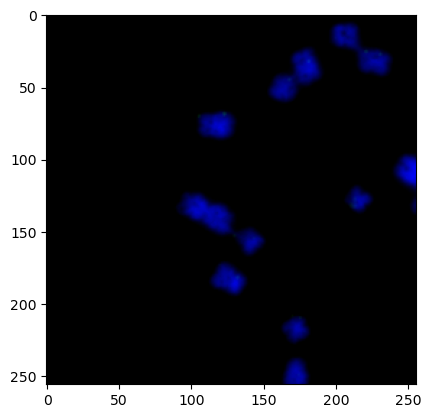

In [9]:
plt.imshow(Image.open("../sampled/"+full_images[i]).convert('RGB'))

### todo
* n-shot learning with 0, 1, and say 10
* graph results of different learning types
* understand minicpm llm aspect
* different context analysis
* descriptions of ecdna